#Introduction
I am assigned to find if there are outliers in the feature Redskap of the dataset.

*TMI：It is my first time to do a project like this, hoppefully I am doing it correctly.

#Preparation
Importing Lirbrary and Simply looking at Data (Useless)
## Summary
- The dataset includes 305434 rows of fishing records, and 45 columns.
- There are a few columns realted to gears used in the fishing activity
  - including "Redskap FAO (kode)", "Redskap FAO", "Redskap FDIR (kode)", "Redskap FDIR"
  - For our convenience, I will use Redskap FAO (kode) in the following analysis.
- Redskap FAO (kode) is categorical data list , instead of numerical data list.

In [1]:
# Importing library that will be used later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset

df = pd.read_csv("INFO284_exam_data_Reading_only.csv")
# you may have to change the filename yourself if you would like to run the program again

print(df) # showing the whole dataset

In [ ]:
# all columns in the dataset
df.columns

In [ ]:
# data type of each column
df.dtypes

# Detecting outliers
You can read the observation first, and check with the codes



In [5]:
# to find NaN in Redskap FAO (kode)
print(df["Redskap FAO (kode)"].isna().sum())

0


In [6]:
# to find NaN in Redskap FAO
print(df["Redskap FAO"].isna().sum())

188


In [7]:
#Proof for point 1 in the Observation

# Select rows where 'Gear FAO (code)' is equal to "SND"
# and retrieve the corresponding values in the 'Gear FAO' column
to_check = df.loc[df['Redskap FAO (kode)'] == "SND", "Redskap FAO"]

check = True
for i in range(len(to_check)):
  # Check if the value is not NaN (not a missing value)
  if not pd.isna(to_check.iloc[i]):
    # If a non-NaN value is found, set check to False and exit the loop
    check = False
    break

print(check)

True


In [8]:
# To see how many types of gear included in Redskap FAO (kode)

# Convert the list to a set to remove duplicates
uniques_gear = set(df["Redskap FAO (kode)"])
num_uniques = len(uniques_gear)

print("Number of unique types of gear:", num_uniques)

Number of unique types of gear: 31


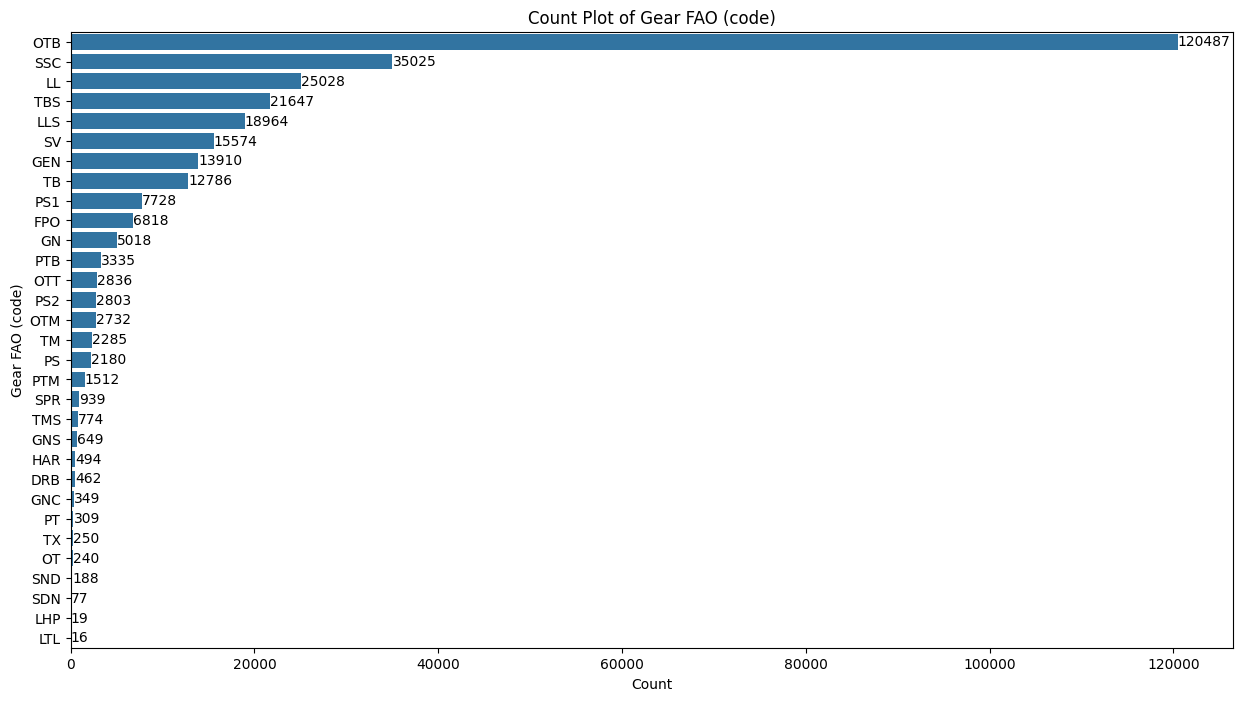

In [9]:
#Visualizing Redskap FAO (kode)

# Get the counts of each unique value in the column "Gear FAO (code)"
category_counts = df["Redskap FAO (kode)"].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(15, 8))

# Create a count plot using seaborn, ordering the bars by their counts
ax = sns.countplot(y="Redskap FAO (kode)", data=df, order=category_counts.index)

# Annotate each bar with its count
for i, count in enumerate(category_counts):
    ax.text(count + 0.1, i, str(count), va='center')

# Set labels and title for the plot
plt.ylabel("Gear FAO (code)")
plt.xlabel('Count')
plt.title('Count Plot of Gear FAO (code)')

# Show the plot
plt.show()

In [ ]:
# for your convenience, here is the counts of each type of gear
print(df["Redskap FAO (kode)"].value_counts())

In [11]:
#for your convenience, here are all the short form and full name of the gears respectively
Gear_list = set(df.apply(lambda row: (row["Redskap FAO (kode)"], row["Redskap FAO"]), axis=1))
Gear_list

{('DRB', 'Skrape, mekanisert'),
 ('FPO', 'Teiner'),
 ('GEN', 'Gillnets and entangling nets (unspec)*'),
 ('GN', 'Udefinert garn'),
 ('GNC', 'Encircling gillnets*'),
 ('GNS', 'Settegarn'),
 ('HAR', 'Harpun,div.'),
 ('LHP', 'Juksa/pilk, manuell'),
 ('LL', 'Andre liner'),
 ('LLS', 'Setteline'),
 ('LTL', 'Dorg/harp/snik'),
 ('OT', 'Udefinert trål'),
 ('OTB', 'Bunntrål, otter'),
 ('OTM', 'Flytetrål, otter'),
 ('OTT', 'Otter dobbeltrål'),
 ('PS', 'Snurpenot/ringnot'),
 ('PS1', 'Snurpenot/ringnot, et fartøy'),
 ('PS2', 'Snurpenot/ringnot, to fartøy'),
 ('PT', 'Partrål, uspesifisert'),
 ('PTB', 'Bunntrål, par'),
 ('PTM', 'Flytetrål, par'),
 ('SDN', 'Snurrevad, dansk'),
 ('SND', nan),
 ('SPR', 'Boat /vessel seines -Pair seines'),
 ('SSC', 'Snurrevad, skotsk'),
 ('SV', 'Snurrevad'),
 ('TB', 'Bunntrål (uspes)'),
 ('TBS', 'Bunntrål, reke'),
 ('TM', 'Flytetrål, uspesifisert'),
 ('TMS', 'Flytetrål, reke'),
 ('TX', 'Annen trål (udefinert)')}

In [ ]:
# Names of all gears in alphabetical order
set(df["Redskap FAO"])

## Observation
1. there is no NaN in the list "Redskap FAO (kode)"
  - HOWEVER, there is one category called SND, which don't have any explanation, and is NaN in the columns Redskap FAO, Redskap FDIR, Redskap FDIR (kode)
  - I think it is something similar to UNKNOWN (I guess only)

2. Type of gear that commonly used:
  - OTB (Bunntrål, otter)
    - 120487/305434, ~ 40% of the whole dataset
  - SSC (Snurrevad, skotsk)
  - LL (Andre liner)

3. We got many similar categories, e.g.
  - 'Snurpenot/ringnot' (PS), 'Snurpenot/ringnot, et fartøy(PS1), 'Snurpenot/ringnot, to fartøy'(PS2)
  -  'Bunntrål (uspes)'{TB), 'Bunntrål, otter(OTB), 'Bunntrål, par'(PTB), 'Bunntrål, reke'(TBS)
  - 'Flytetrål, otter'(OTM),'Flytetrål, par'(PTM), 'Flytetrål, reke'(TMS), 'Flytetrål, uspesifisert(TM)
  - 'Snurrevad'(SV), 'Snurrevad, dansk(SDN), 'Snurrevad, skotsk'(SSC)
  - 'Udefinert garn' (GN), 'Udefinert trål'(OT)

# Methods to deal with outliers

1. Grouping (I think this one is better)
  - Referring to point 3 in the observation, we can group the similar categories into one, e.g.
    - "PS", "PS1", "PS2" --> 'Snurpenot/ringnot'
    - "TB", "PTB", "TBS" --> 'Other Bunntrål'
      - I put 'Bunntrål, otter'(OTB) out of this group because of its large amount
    - "OTM", "PTM", "TMS", "TM" --> 'Flytetrål'
    - "SV", "SDN", "SSC"--> 'Snurrevad'
    - "GN", "OT" --> 'Undefined'
    - for the reamaining categories,
      - those contains less than 5000 entries, I put them into the same group
        - 'OTT', 'SPR', 'GNS', 'HAR', 'DRB', 'GNC', 'PT', 'TX', 'LHP', 'LTL' --> "Others"
        - because of their small amounts
      - for those contains more than 5000 entries, they stay alone, which included
        - "OTB", "LL", "LLS", "GEN', "FPO"
    - for "SND", since I don't know what it is, I didn't put it into any groups
  - Questions:
    - Shall we put 'SND" into "Undefined" group?
      - or we can just drop it? (since it only have 188 entries) (Method 1.1)
    - Shall we combine group "Undefined" and group "Others"? (Method 1.1)

2. Exclusion (which I don't think it's a good idea)
  - I assume the categories that have less than 1000 entries are difficult to be predicted so
    - Entries categorized as "SPR", "TMS", "GNS", "HAR", "DRB", "GNC", "PT", "TX", "OT", "SND", "SDN", "LHP", "LTL" will be dropped
    - 4766 entries will be dropped.(you can refer to the graph at the bottom)



## Method 1

In [13]:
df["Gear NEW 1"] = None

df.loc[df["Redskap FAO (kode)"].isin(['PTB', 'TB', 'TBS']), "Gear NEW 1"] = "Other Bunntrål"
df.loc[df["Redskap FAO (kode)"].isin(['OTM', 'PTM', 'TM', "TMS"]), "Gear NEW 1"] = "Flytetrål"
df.loc[df["Redskap FAO (kode)"].isin(['PS', 'PS1', 'PS2']), "Gear NEW 1"] = "Snurpenot/ringnot"
df.loc[df["Redskap FAO (kode)"].isin(['SSC', 'SDN', 'SV']), "Gear NEW 1"] = "Snurrevad"
df.loc[df["Redskap FAO (kode)"].isin(['GN', 'OT']), "Gear NEW 1"] = "Undefined"
df.loc[df["Redskap FAO (kode)"].isin(['OTT', 'SPR', 'GNS', 'HAR', 'DRB', 'GNC', 'PT', 'TX', 'LHP', 'LTL']), "Gear NEW 1"] = "Others"

df["Gear NEW 1"].fillna(df["Redskap FAO (kode)"], inplace=True)

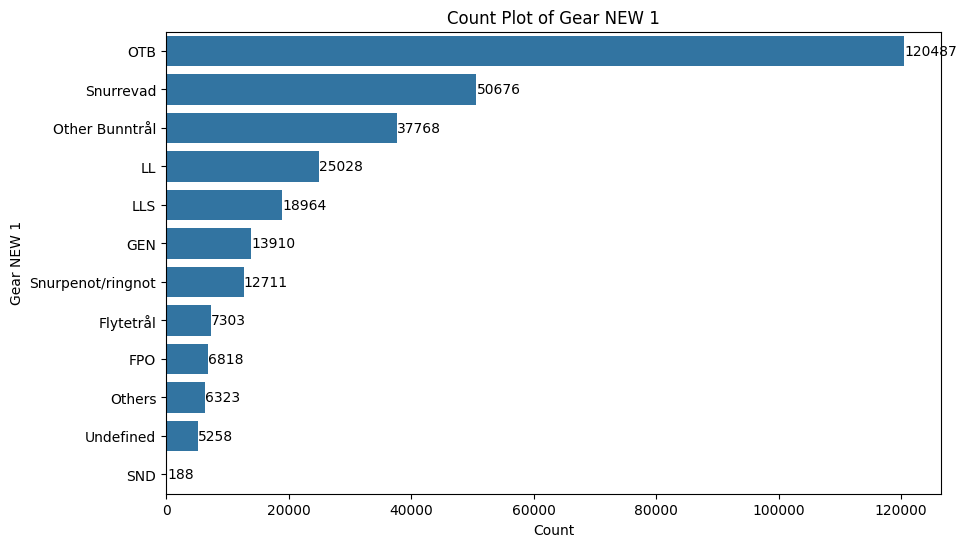

In [14]:
#Visualizing for Method 1

# Get the counts of each unique value in the column "Gear FAO (code)"
category_counts_new = df["Gear NEW 1"].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot using seaborn, ordering the bars by their counts
ax = sns.countplot(y=df["Gear NEW 1"], data=df, order=category_counts_new.index)

# Annotate each bar with its count
for i, count in enumerate(category_counts_new):
    ax.text(count + 0.1, i, str(count), va='center')

# Set labels and title for the plot
plt.ylabel("Gear NEW 1")
plt.xlabel('Count')
plt.title('Count Plot of Gear NEW 1')

# Show the plot
plt.show()

In [15]:
print(category_counts_new)
print()
print("number of group:", len(set(df["Gear NEW 1"])))

OTB                  120487
Snurrevad             50676
Other Bunntrål        37768
LL                    25028
LLS                   18964
GEN                   13910
Snurpenot/ringnot     12711
Flytetrål              7303
FPO                    6818
Others                 6323
Undefined              5258
SND                     188
Name: Gear NEW 1, dtype: int64

number of group: 12


### For the situation that if we dropped "SND" and combined "Others" and "Undefined" (Method 1.1)

In [16]:
df["Gear NEW 1.1"] = None

df.loc[df["Redskap FAO (kode)"].isin(['PTB', 'TB', 'TBS']), "Gear NEW 1.1"] = "Bunntrål"
df.loc[df["Redskap FAO (kode)"].isin(['OTM', 'PTM', 'TM', "TMS"]), "Gear NEW 1.1"] = "Flytetrål"
df.loc[df["Redskap FAO (kode)"].isin(['PS', 'PS1', 'PS2']), "Gear NEW 1.1"] = "Snurpenot/ringnot"
df.loc[df["Redskap FAO (kode)"].isin(['SSC', 'SDN', 'SV']), "Gear NEW 1.1"] = "Snurrevad"
df.loc[df["Redskap FAO (kode)"].isin(['GN', 'OT', 'OTT', 'SPR', 'GNS', 'HAR', 'DRB', 'GNC', 'PT', 'TX', 'LHP', 'LTL']), "Gear NEW 1.1"] = "Others"

df["Gear NEW 1.1"].fillna(df["Redskap FAO (kode)"], inplace=True)

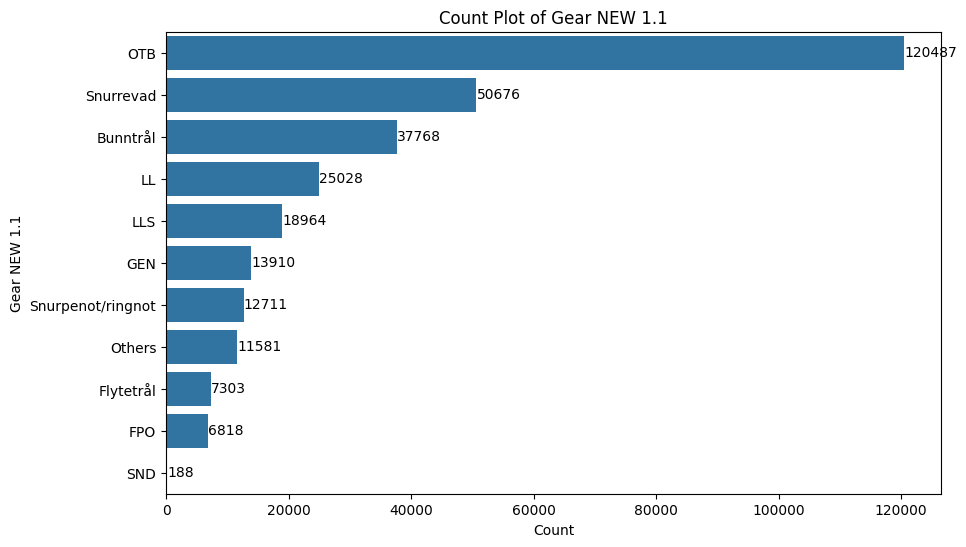

In [17]:
#Visualizing for Method 1.1

# Get the counts of each unique value in the column "Gear FAO (code)"
category_counts_new_1_1 = df["Gear NEW 1.1"].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot using seaborn, ordering the bars by their counts
ax = sns.countplot(y=df["Gear NEW 1.1"], data=df, order=category_counts_new_1_1.index)

# Annotate each bar with its count
for i, count in enumerate(category_counts_new_1_1):
    ax.text(count + 0.1, i, str(count), va='center')

# Set labels and title for the plot
plt.ylabel("Gear NEW 1.1")
plt.xlabel('Count')
plt.title('Count Plot of Gear NEW 1.1')

# Show the plot
plt.show()

In [26]:
#print(category_counts_new_1_1)
#print()
print("number of group:", len(set(df["Gear NEW 1.1"])))
print("'SND' should be ignored, so number of group:", len(set(df["Gear NEW 1.1"]))-1)

number of group: 11
'SND' should be ignored, so number of group: 10


## Method 2

In [19]:
df["Gear NEW 2"] = None

df.loc[df["Redskap FAO (kode)"].isin(["SPR", "TMS", "GNS", "HAR", "DRB", "GNC", "PT", "TX", "OT", "SND", "SDN", "LHP", "LTL"]), "Gear NEW 2"] = "dropped"
df["Gear NEW 2"].fillna(df["Redskap FAO (kode)"], inplace=True)

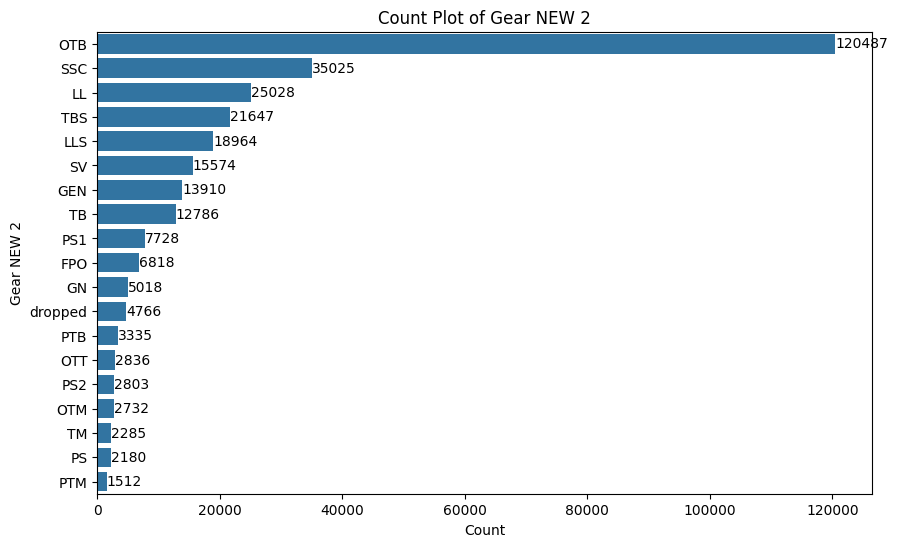

In [20]:
#Visualizing for Method 2

# Get the counts of each unique value in the column "Gear FAO (code)"
category_counts_new_2 = df["Gear NEW 2"].value_counts()

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot using seaborn, ordering the bars by their counts
ax = sns.countplot(y=df["Gear NEW 2"], data=df, order=category_counts_new_2.index)

# Annotate each bar with its count
for i, count in enumerate(category_counts_new_2):
    ax.text(count + 0.1, i, str(count), va='center')

# Set labels and title for the plot
plt.ylabel("Gear NEW 2")
plt.xlabel('Count')
plt.title('Count Plot of Gear NEW 2')

# Show the plot
plt.show()

In [27]:
#print(category_counts_new_2)
#print()
print("number of group:", len(set(df["Gear NEW 2"])))
print("'dropped' should be ignored, so number of group:", len(set(df["Gear NEW 2"]))-1)

number of group: 19
'dropped' should be ignored, so number of group: 18
